In [1]:
#3D Plots
from mpl_toolkits import mplot3d  
from nsepy import get_history as gh
import datetime as dt
from datetime import date
from matplotlib import pyplot as plt
from IPython.display import clear_output
import warnings
import numpy as np
import pandas as pd
#stonks
#stk1 = gh(symbol='SBIN',start=date(2015,1,1),end=date(2015,1,10))
#print(stk1)
#Data Preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
#Time Series Machine Learning Based
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout  
from keras.models import Sequential 
import tensorflow as tf
#Discrete
import random

### Generate the training data needed

In [2]:
fwd = np.zeros(1000) + 1
bwd = np.zeros(300) - 3.1
data =  fwd.tolist() + bwd.tolist()
len(data) 
random.shuffle(data)

In [3]:
fwd2 = np.zeros(1200) + 1
bwd2 = np.zeros(100) - 11.1
data2 =  fwd2.tolist() + bwd2.tolist()
len(data2) 
random.shuffle(data2)

In [4]:
#Differences in dataset
def cumular(inputs):
    differentials = []
    tot = 0
    for i in range(len(inputs) - 1):
        tot += inputs[i]
        differentials.append(tot)
    return differentials

In [5]:
input_data_y = cumular(data)
input_data_z = cumular(data2)

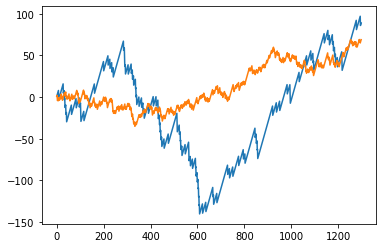

In [6]:
plt.plot(input_data_z)
plt.plot(input_data_y)

In [7]:
len(input_data_y)

1299

In [8]:
dY = pd.DataFrame({'Y': input_data_y})
dZ = pd.DataFrame({'Z': input_data_z})
sc = MinMaxScaler(feature_range = (0, 1))

In [9]:
#Y training data
Ytrain_data = dY
Ytrain_set = Ytrain_data.iloc[:,0:1].values 
Ytraining_set_scaled = sc.fit_transform(Ytrain_set)
#Z training data
Ztrain_data = dZ
Ztrain_set = Ztrain_data.iloc[:,0:1].values 
Ztraining_set_scaled = sc.fit_transform(Ztrain_set)

In [10]:
#Y training data preprocessed 
X0_train = []
y0_train = []
for i in range(100,1299):
    X0_train.append(Ytraining_set_scaled[i-100:i, 0])
    y0_train.append(Ytraining_set_scaled[i, 0]) 
X0_train, y0_train = np.array(X0_train), np.array(y0_train)
X0_train = np.reshape(X0_train, (X0_train.shape[0], X0_train.shape[1], 1))

In [11]:
#Z training data preprocessed  
X1_train = []
y1_train = []
for i in range(100,1299):
    X1_train.append(Ztraining_set_scaled[i-100:i, 0])
    y1_train.append(Ztraining_set_scaled[i, 0]) 
X1_train, y1_train = np.array(X1_train), np.array(y1_train)
X1_train = np.reshape(X1_train, (X1_train.shape[0], X1_train.shape[1], 1))

### The testing data is generated and organized here

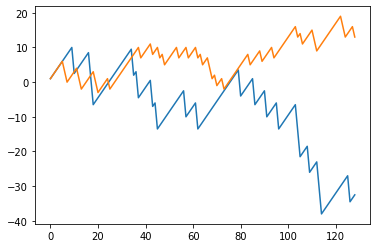

In [12]:
a = np.zeros(100) + 1
b = np.zeros(30)- 3
ytest = a.tolist() + b.tolist()
random.shuffle(ytest)
ytest_data = cumular(ytest) 



c = np.zeros(110) + 1
d = np.zeros(20)- 7.5
ztest = c.tolist() + d.tolist()
random.shuffle(ztest)
ztest_data = cumular(ztest) 

plt.plot(ztest_data) 
plt.plot(ytest_data)

In [13]:
#Test dataframes
dYtest = pd.DataFrame({'Y': ytest_data})
dZtest = pd.DataFrame({'Z': ztest_data})

In [14]:
#y inputs
ytest_data = dYtest['Y']
ytest_set = ytest_data.iloc[:].values
ydataset_total = pd.concat((dY['Y'], dYtest ['Y']), axis = 0)
y_inputs = ydataset_total[len(ydataset_total) - len(ytest_data) - 100:].values

y_inputs = y_inputs.reshape(-1,1)
y_inputs = sc.transform(y_inputs)

In [15]:
#z inputs
ztest_data = dZtest['Z']
ztest_set = ztest_data.iloc[:].values
zdataset_total = pd.concat((dZ['Z'], dZtest ['Z']), axis = 0)
z_inputs = zdataset_total[len(zdataset_total) - len(ztest_data) - 100:].values

z_inputs = z_inputs.reshape(-1,1)
z_inputs = sc.transform(z_inputs)

In [16]:
y_inputs.shape, z_inputs.shape

((229, 1), (229, 1))

In [17]:
X0_test = []
y0_test = []
for i in range(100 ,229):
    X0_test.append(y_inputs[i-100:i, 0])
    y0_test.append(y_inputs[i, 0]) 
X0_test, y0_test = np.array(X0_test), np.array(y0_test)
X0_test = np.reshape(X0_test, (X0_test.shape[0], X0_test.shape[1], 1))

X1_test = []
y1_test = []
for i in range(100 ,229):
    X1_test.append(z_inputs[i-100:i, 0])
    y1_test.append(z_inputs[i, 0]) 
X1_test, y1_test = np.array(X1_test), np.array(y1_test)
X1_test = np.reshape(X1_test, (X1_test.shape[0], X1_test.shape[1], 1))

In [19]:
#y_train is the OPEN data which we seek to predict 
#X_train is the past data used to predict from y_train data
#train_set[60-60:60, 0].shape 
#train_set[60, 0] 

In [23]:
#Deep learning model parameters. Includes learning rate, plotting variables, etc

class ModelParameters(tf.keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        self.acc = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        old_lr = self.model.optimizer.lr.read_value()
        new_lr = old_lr * 0.99   
        # Append the logs, losses and accuracies to the lists
        self.model.optimizer.lr.assign(new_lr)
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        print("\nEpoch: {}. Reducing Learning Rate from {} to {}".format(epoch, old_lr, new_lr))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            #plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_losses, label = "val_loss")
            #plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

params = ModelParameters()

In [25]:
#Model for going forwards/accelerating
'''
lstm1 = Sequential()
lstm1.add(LSTM(units = 75, return_sequences = True, input_shape = (X1_train.shape[1], 1))) 
lstm1.add(Dropout(0.2))
lstm1.add(LSTM(units = 75, return_sequences = True))
lstm1.add(Dropout(0.2))
lstm1.add(LSTM(units = 75, return_sequences = True))
lstm1.add(Dropout(0.2))
lstm1.add(LSTM(units = 75, return_sequences = True))
lstm1.add(Dropout(0.2))
lstm1.add(LSTM(units = 75, return_sequences = True))
lstm1.add(Dropout(0.2))
lstm1.add(LSTM(units = 75))
lstm1.add(Dropout(0.2))
lstm1.add(Dense(units = 1))
'''

#Model for turning
lstm0 = Sequential()
lstm0.add(LSTM(units = 75, return_sequences = True, input_shape = (X0_train.shape[1], 1))) 
lstm0.add(Dropout(0.2))
lstm0.add(LSTM(units = 75, return_sequences = True))
lstm0.add(Dropout(0.2))
lstm0.add(LSTM(units = 75, return_sequences = True))
lstm0.add(Dropout(0.2))
lstm0.add(LSTM(units = 75, return_sequences = True))
lstm0.add(Dropout(0.2))
lstm0.add(LSTM(units = 75, return_sequences = True))
lstm0.add(Dropout(0.2))
lstm0.add(LSTM(units = 75))
lstm0.add(Dropout(0.2))
lstm0.add(Dense(units = 1))

In [26]:
lstm0.compile(optimizer = 'adam', loss = 'mean_squared_error')

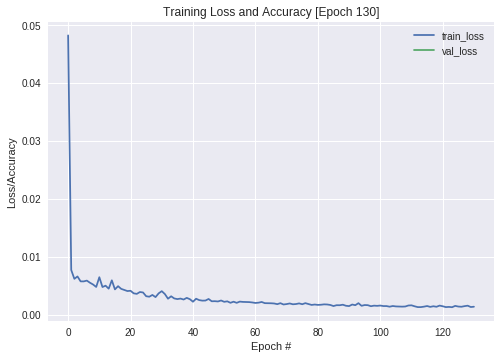

38/38 [==============================] - 13s 331ms/step - loss: 0.0014


In [27]:
lstm0.fit(X0_train,
         y0_train,
         epochs = 131, 
         batch_size = 32,
        #validation_data = (X_test, y_test),
        callbacks=[params])

In [28]:
#The right/left turning data
preds0 = lstm0.predict(X0_test)

In [ ]:
#The forwards backwards data predicted
predsz = lstm0.predict(X1_test)

<Figure size 576x396 with 0 Axes>

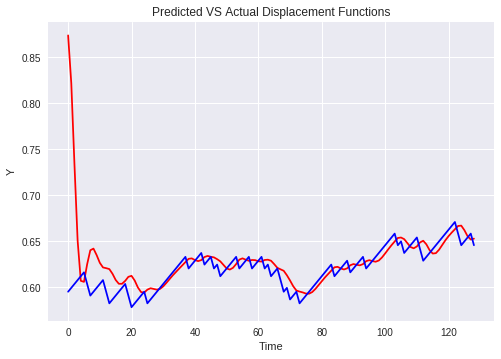

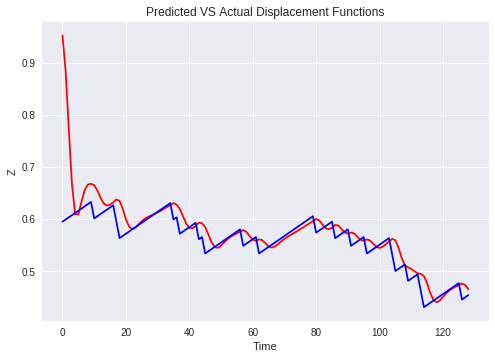

In [149]:
fig = plt.figure()
plt.subplots(1,1)
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Predicted VS Actual Displacement Functions')

plt.plot(preds0, 'red', label = 'Y')
plt.plot(y0_test, 'blue', label ='Actual Displacement') 
 
plt.show()

 
plt.xlabel('Time')
plt.ylabel('Z')
plt.title('Predicted VS Actual Displacement Functions')

plt.plot(predsz, 'red', label = 'Z')
plt.plot(y1_test, 'blue', label ='$Actual Displacement') 

plt.show()




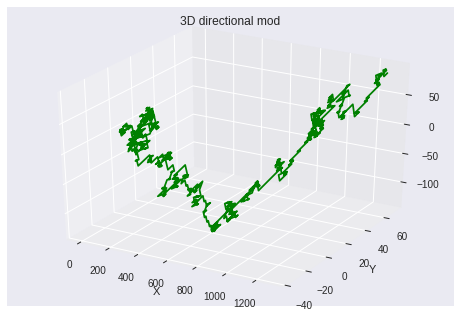

In [57]:
from mpl_toolkits import mplot3d  
fig = plt.figure() 
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 

x = np.linspace(0,1298,1299) 

 
y = input_data_y 
z = input_data_z 
  
# plotting 
ax.plot3D(x, y, z, 'green') 
ax.set_title('3D directional mod') 
plt.xlabel('X')
plt.ylabel('Y')


plt.show() 

In [64]:
y_ax = preds0.reshape(1,129)[0].tolist()

z_ax = predsz.reshape(1,129)[0].tolist()
z_ax,y_ax

([0.9530662298202515,
  0.8836739659309387,
  0.7718124389648438,
  0.6656946539878845,
  0.6093906164169312,
  0.6088703274726868,
  0.6336632966995239,
  0.6557298302650452,
  0.6664028763771057,
  0.6680143475532532,
  0.6652316451072693,
  0.6549959778785706,
  0.6411126852035522,
  0.6302132606506348,
  0.6259490251541138,
  0.627651572227478,
  0.632429301738739,
  0.637638509273529,
  0.6351364254951477,
  0.6199289560317993,
  0.5999894142150879,
  0.5855237245559692,
  0.5808373093605042,
  0.583859384059906,
  0.5901346206665039,
  0.5963002443313599,
  0.6010400056838989,
  0.6044584512710571,
  0.6071934103965759,
  0.6098448038101196,
  0.6127568483352661,
  0.6160218119621277,
  0.6195749044418335,
  0.623293936252594,
  0.6270672082901001,
  0.6308236718177795,
  0.6276917457580566,
  0.6195557117462158,
  0.6057264804840088,
  0.5915961861610413,
  0.5832610130310059,
  0.582484781742096,
  0.5869225263595581,
  0.5931340456008911,
  0.5920623540878296,
  0.584715723991

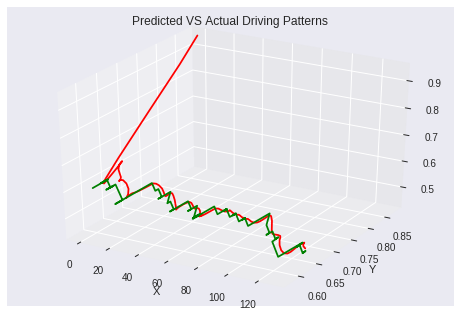

In [73]:
from mpl_toolkits import mplot3d  
fig = plt.figure() 
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 

x = np.linspace(0,128,129) 

 
y = y_ax
z = z_ax
y1 = y0_test
z1 = y1_test  
    
# plotting 
ax.plot3D(x, y, z, 'red') 
ax.plot3D(x, y1, z1, 'green') 

ax.set_title('Predicted VS Actual Driving Patterns') 
plt.xlabel('X')
plt.ylabel('Y')


plt.show() 

In [56]:
len( input_data_y )

1299

In [51]:
news[0].tolist() 

[0.8738366365432739,
 0.8218153119087219,
 0.7335605621337891,
 0.6505804657936096,
 0.6068951487541199,
 0.605741024017334,
 0.6248538494110107,
 0.6401349306106567,
 0.6419262290000916,
 0.6348323822021484,
 0.6264644265174866,
 0.6214349865913391,
 0.620640754699707,
 0.6196603775024414,
 0.6145360469818115,
 0.607820451259613,
 0.6036398410797119,
 0.6036361455917358,
 0.6067997813224792,
 0.6112197041511536,
 0.6123002171516418,
 0.6072067022323608,
 0.5996798872947693,
 0.594640851020813,
 0.5941365361213684,
 0.597259521484375,
 0.598812460899353,
 0.598076581954956,
 0.5972623825073242,
 0.5981141924858093,
 0.6008280515670776,
 0.6046648621559143,
 0.6088134050369263,
 0.6128110289573669,
 0.6165494322776794,
 0.6201121211051941,
 0.6236249208450317,
 0.6271777749061584,
 0.6308071613311768,
 0.6312747001647949,
 0.6294744610786438,
 0.6282871961593628,
 0.6294193863868713,
 0.6327372789382935,
 0.6339464783668518,
 0.6330214142799377,
 0.6323867440223694,
 0.6304264068603516,

In [79]:
len(zdataset_total)
len(ydataset_total) - 1299

129

In [88]:
y_total = ydataset_total.values.reshape(-1,1)
y_total = sc.transform(y_total)

In [89]:
y_total

array([[0.59502739],
       [0.59924147],
       [0.58617783],
       ...,
       [0.65402444],
       [0.65823852],
       [0.64559629]])

In [90]:
z_total = zdataset_total.values.reshape(-1,1)
z_total = sc.transform(z_total)

In [98]:
z_total.reshape(1,1428).tolist()[0]

[0.5950273914875682,
 0.5992414664981034,
 0.6034555415086387,
 0.6076696165191738,
 0.611883691529709,
 0.6160977665402442,
 0.6203118415507793,
 0.6245259165613145,
 0.577749683944374,
 0.5819637589549091,
 0.5861778339654443,
 0.5903919089759795,
 0.5946059839865148,
 0.5988200589970499,
 0.6030341340075851,
 0.6072482090181203,
 0.6114622840286554,
 0.6156763590391907,
 0.6198904340497259,
 0.624104509060261,
 0.6283185840707962,
 0.6325326590813314,
 0.6367467340918666,
 0.6409608091024018,
 0.645174884112937,
 0.6493889591234722,
 0.6536030341340073,
 0.6578171091445425,
 0.611040876527602,
 0.6152549515381371,
 0.6194690265486723,
 0.6236831015592075,
 0.576906868942267,
 0.5811209439528021,
 0.5853350189633373,
 0.5385587863463968,
 0.5427728613569319,
 0.5469869363674671,
 0.5512010113780023,
 0.5044247787610617,
 0.5086388537715969,
 0.5128529287821321,
 0.46607669616519154,
 0.4702907711757267,
 0.4745048461862619,
 0.4787189211967971,
 0.48293299620733227,
 0.48714707121786

In [ ]:
###The 3D Vector Function Used to 

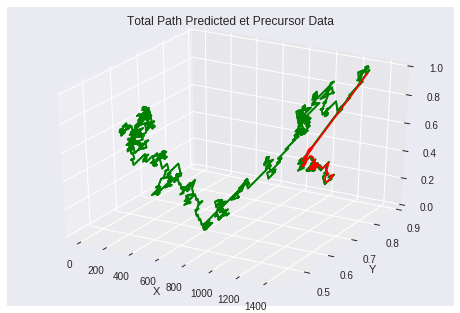

In [108]:
fig = plt.figure() 
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 

x = np.linspace(0,1427,1428) 

 
y = y_total.reshape(1,1428).tolist()[0]
z = z_total.reshape(1,1428).tolist()[0]
  
# plotting 
#plt.subplots(1,2,1)
ax.plot3D(x, y, z, 'green') 
#ax.plot3D(np.linspace(1299,1428,129), y_ax, z_ax, 'red') 

ax.set_title('Total Path Predicted et Precursor Data') 
plt.xlabel('X')
plt.ylabel('Y') 

#plt.subplots(2,2,1)

ax.plot3D(x, y, z, 'green') 
ax.plot3D(np.linspace(1299,1428,129), y_ax, z_ax, 'red') 

plt.show() 